In [3]:
from sennet.core.mmap_arrays import read_mmap_array
import numpy as np

mask_dir = "/opt/kaggle/sennet/data_dumps/processed/kidney_2/label/"

mask = read_mmap_array(mask_dir, mode="r")


In [5]:
mask

MmapArray(data=memmap([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        ...,

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ...,

In [20]:
from tqdm import tqdm


block_size = 128

# np.array(mask.data[0:256, :, :].data).mean()

n_blocks = mask.shape[0] // block_size

avg_mask_values = []

for i in tqdm(range(n_blocks), total=n_blocks):
	avg_mask_values.append(np.array(mask.data[i*block_size:(i+1)*block_size, :, :].data).mean())



100%|██████████| 17/17 [00:07<00:00,  2.30it/s]


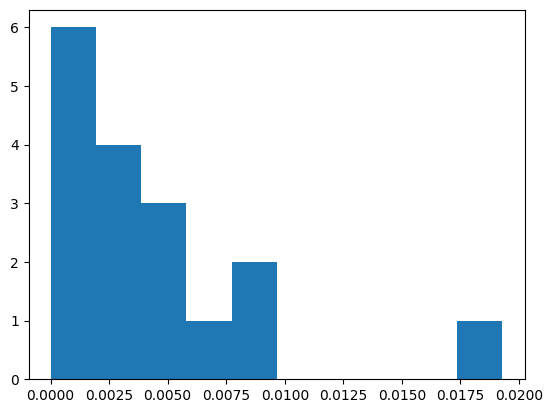

In [21]:
import matplotlib.pyplot as plt

plt.hist(avg_mask_values);

  0%|          | 0/35 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 15.18it/s]


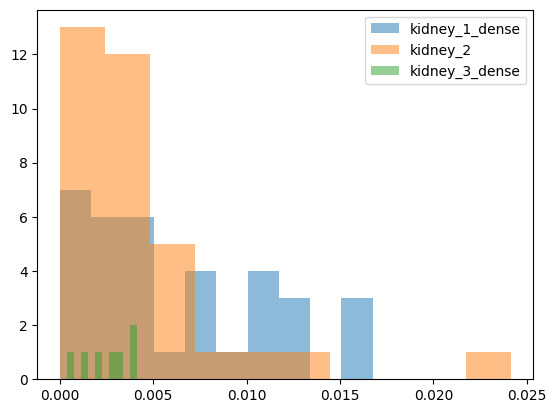

In [13]:
from sennet.core.mmap_arrays import read_mmap_array
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

labels = ["kidney_1_dense", "kidney_2", "kidney_3_dense"]
block_size = 64


for label in labels:
    mask_dir = f"/opt/kaggle/sennet/data_dumps/processed/{label}/label/"
    mask = read_mmap_array(mask_dir, mode="r")
    n_blocks = mask.shape[0] // block_size
    avg_mask_values = []
    for i in tqdm(range(n_blocks), total=n_blocks):
        avg_mask_values.append(np.array(mask.data[i*block_size:(i+1)*block_size, :, :].data).mean())
	
    plt.hist(avg_mask_values, label=label, alpha=0.5)
	
 
plt.legend()